In [830]:
#
# Chapter 10, Example 1
#

import os
import pylab
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers, models

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

In [831]:
# Define input patterns
X = tf.constant(np.array([[1, 0, 1, 0, 0],
                [0, 0, 1, 1, 0],
                [1, 1, 0, 1, 1],
                [0, 1, 1, 1, 0]]), dtype=tf.float32)

In [832]:
# Built Model
seed = 20
np.random.seed(seed)
tf.random.set_seed(seed)
tf.keras.backend.set_floatx('float32')
class Autoencoder(Model):
    def __init__(self, n_input, n_hidden):
        super(Autoencoder, self).__init__()
        # Initialize the weights and biases
        self.W = tf.Variable(tf.keras.backend.truncated_normal([n_input, n_hidden], stddev=1/np.sqrt(n_input)))
        self.b = tf.Variable(tf.zeros([n_hidden]))
        self.b_prime = tf.Variable(tf.zeros([n_input]))

    def call(self, x):
        h = tf.sigmoid(tf.matmul(x, self.W) + self.b)
        y = tf.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.b_prime)
        o = tf.where(tf.greater(y, 0.5), tf.ones(tf.shape(y)), tf.zeros(tf.shape(y)))
        return y, o

autoencoder = Autoencoder(n_input=5,n_hidden=3)

In [833]:
# Set an optimizer and loss function for training
optimizer = tf.optimizers.SGD(learning_rate=0.1)
def loss(y,o,original):
    entropy_loss = - tf.reduce_mean(tf.reduce_sum(original * tf.math.log(y) + (1. - original) * tf.math.log(1. - y), axis=1))
    bit_loss = tf.reduce_sum(tf.cast(tf.not_equal(o,original), tf.int32))
    return entropy_loss, bit_loss 

In [834]:
# Training function
def train(original):
    with tf.GradientTape() as tape:
        y,o = autoencoder(original)
        entropy_loss, bit_loss = loss(y, o, original)
        trainable_variables = [autoencoder.W,autoencoder.b,autoencoder.b_prime]
        gradients = tape.gradient(entropy_loss, trainable_variables)
        gradient_variables = zip(gradients, trainable_variables)
        optimizer.apply_gradients(gradient_variables)
    return entropy_loss, bit_loss

In [835]:
# Main function: train the model
epochs = 2000
l, bl = [], [] 
for i in range(epochs):
    l_, bl_ = train(X)
    l.append(l_)
    bl.append(bl_)
    if i%100 == 0:
        print('epoch: %d, entropy_loss: %f, bit_loss: %g'%(i, l[i], bl[i]))

epoch: 0, entropy_loss: 3.604158, bit_loss: 11
epoch: 100, entropy_loss: 2.225246, bit_loss: 3
epoch: 200, entropy_loss: 1.336256, bit_loss: 1
epoch: 300, entropy_loss: 0.979913, bit_loss: 1
epoch: 400, entropy_loss: 0.795814, bit_loss: 0
epoch: 500, entropy_loss: 0.669705, bit_loss: 0
epoch: 600, entropy_loss: 0.567741, bit_loss: 0
epoch: 700, entropy_loss: 0.489738, bit_loss: 0
epoch: 800, entropy_loss: 0.430190, bit_loss: 0
epoch: 900, entropy_loss: 0.383573, bit_loss: 0
epoch: 1000, entropy_loss: 0.346149, bit_loss: 0
epoch: 1100, entropy_loss: 0.315439, bit_loss: 0
epoch: 1200, entropy_loss: 0.289770, bit_loss: 0
epoch: 1300, entropy_loss: 0.267980, bit_loss: 0
epoch: 1400, entropy_loss: 0.249243, bit_loss: 0
epoch: 1500, entropy_loss: 0.232951, bit_loss: 0
epoch: 1600, entropy_loss: 0.218650, bit_loss: 0
epoch: 1700, entropy_loss: 0.205993, bit_loss: 0
epoch: 1800, entropy_loss: 0.194710, bit_loss: 0
epoch: 1900, entropy_loss: 0.184587, bit_loss: 0


In [836]:
# Show the weights and bias in autoencoder
print('W:\n {}\n'.format(autoencoder.W))
print('b:\n {}\n'.format(autoencoder.b))
print('b_prime:\n {}\n'.format(autoencoder.b_prime))

W:
 <tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[-4.8091908 ,  1.7937043 ,  5.8040457 ],
       [ 2.0220833 ,  6.6932735 ,  0.36239454],
       [ 0.59727955, -5.5660567 , -4.0774484 ],
       [ 6.0820856 ,  2.0257425 , -2.1777086 ],
       [-0.06413934,  4.3408628 ,  4.264834  ]], dtype=float32)>

b:
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-1.0552251, -2.293724 , -1.3106219], dtype=float32)>

b_prime:
 <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([ 0.27650997, -4.295106  ,  6.1162057 , -1.6020348 , -5.8081393 ],
      dtype=float32)>



In [839]:
# Evaluate result of reconstruction
y,o = autoencoder(X)
print('Input:\n {}\n'.format(X))
print('Output:\n {}\n'.format(y))
print('Output_binary:\n {}\n'.format(o))

Input:
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0.]]

Output:
 [[0.9770907  0.01710915 0.9746585  0.05323951 0.03809718]
 [0.01090956 0.09444085 0.998762   0.9886031  0.00285116]
 [0.97207254 0.9898099  0.04801812 0.97610813 0.9391081 ]
 [0.03675654 0.9189609  0.9426763  0.99726427 0.05627325]]

Output_binary:
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0.]]



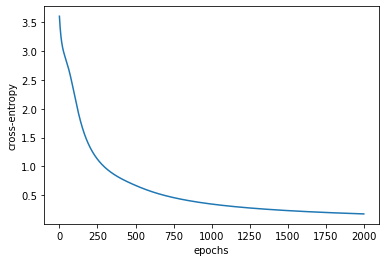

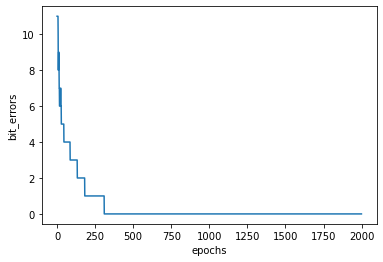

In [840]:
# Show the curve of cross-entropy loss
pylab.figure()
pylab.plot(range(epochs), l)
pylab.xlabel('epochs')
pylab.ylabel('cross-entropy')
pylab.savefig('./figures/10.1_1.png')

# Show the curve of bit errors
pylab.figure()
pylab.plot(range(epochs), bl)
pylab.xlabel('epochs')
pylab.ylabel('bit_errors')
pylab.savefig('./figures/10.1_2.png')

pylab.show()